## Regression example

In [55]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

### Creating regression dataset

> Consider the model **y = mx + c**.

> **m and c** are the parameters to be determined.

> Let **true values** of parameters be **m=4, c=3**

> We generate a dataset with these true values and add some noise

> We have to check if our tensorflow model can give extimates close to true value

In [75]:
x = np.linspace(0,10,100000).reshape(-1,1)
y = 4*x + 3 + np.random.normal(0,0.8,(100000,1))

In [76]:
df = pd.DataFrame(np.hstack((x,y)),columns=['X','Y'])

In [77]:
df.head()

,X,Y
0,0.0000,2.748881
1,0.0001,2.882614
2,0.0002,2.283480
3,0.0003,4.288539
4,0.0004,2.094565


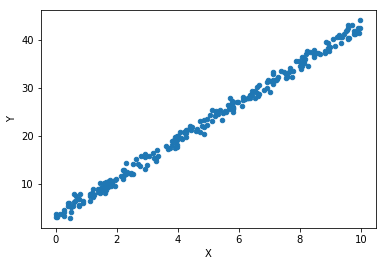

In [78]:
df.sample(n=250).plot(x='X',y='Y',kind='scatter') #we just plot a sample

### Initial fit  

> **y = mx + c**
>> **m and c** are variables.

>> Let the initial values be m=0.1 and c=3

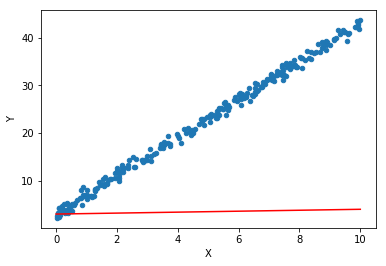

In [79]:
y_initial = 0.1*x + 3
df.sample(n=250).plot(x='X',y='Y',kind='scatter')
plt.plot(x,y_initial,'r')

### Online training for one epoch

> Training time is slower

In [80]:
m = tf.Variable(0.1)
c = tf.Variable(3.)
inp = tf.placeholder(tf.float32)
target = tf.placeholder(tf.float32)

In [81]:
y_model = m*inp + c
error = (y_model-target)**2

In [82]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(error)

In [83]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    #Shuffle data
    d = list(zip(x,y)) #[(x1,y1),(x2,y2)....]
    random.shuffle(d)
    
    for i,j in d:
        sess.run(train,feed_dict={inp:i,target:j})
        
    m_final, c_final = sess.run([m,c])

print(m_final,c_final)

4.063218 2.8854036


Recall the true values are m=4, c=3. They are pretty close

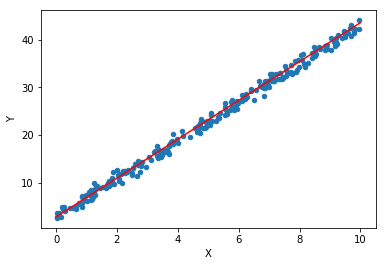

In [84]:
y_final = m_final*x + c_final
df.sample(n=250).plot(x='X',y='Y',kind='scatter')
plt.plot(x,y_final,'r')

### Batch training

> Quick training and better fit

In [85]:
batch_size = 10

m = tf.Variable(0.1)
c = tf.Variable(3.)
inp = tf.placeholder(tf.float32,(batch_size,1))
target = tf.placeholder(tf.float32,(batch_size,1))

y_model = m*inp + c
error = tf.reduce_mean((y_model-target)**2)

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(error)

**Getting a batch** 

In [86]:
#Get 10 random indices
rand_ind = np.random.randint(0,len(x),size=batch_size)
rand_ind

array([44554, 66965, 10083, 57854, 96360, 60742, 81879, 68951, 80554,
       30062])

In [87]:
x[rand_ind]

array([[4.45544455],
       [6.69656697],
       [1.00831008],
       [5.78545785],
       [9.63609636],
       [6.07426074],
       [8.18798188],
       [6.89516895],
       [8.05548055],
       [3.00623006]])

**Training**

Quick training and we did not even look at all samples

In [88]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(1000):
        rand_ind = np.random.randint(0,len(x),size=batch_size)
        feed = {inp:x[rand_ind],target:y[rand_ind]}
        sess.run(train,feed_dict=feed)
        
    m_final, c_final = sess.run([m,c])

print(m_final,c_final)     

4.006154 2.9960327


Very close to true values

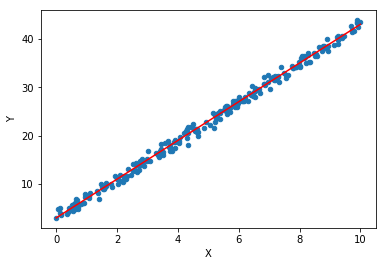

In [89]:
y_final = m_final*x + c_final
df.sample(n=250).plot(x='X',y='Y',kind='scatter')
plt.plot(x,y_final,'r')